<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Считаем-данные-из-файла-и-сохраним-их-в-переменную" data-toc-modified-id="Считаем-данные-из-файла-и-сохраним-их-в-переменную-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Считаем данные из файла и сохраним их в переменную</a></span></li><li><span><a href="#Выведем-первые-5-и-последние-5-строк-датафрейма" data-toc-modified-id="Выведем-первые-5-и-последние-5-строк-датафрейма-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выведем первые 5 и последние 5 строк датафрейма</a></span></li><li><span><a href="#Выведем-основную-информацию-о-датафрейме-с-помощью-метода-info()" data-toc-modified-id="Выведем-основную-информацию-о-датафрейме-с-помощью-метода-info()-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выведем основную информацию о датафрейме с помощью метода info()</a></span></li><li><span><a href="#Проверим-ряд-на-монотонность" data-toc-modified-id="Проверим-ряд-на-монотонность-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проверим ряд на монотонность</a></span></li><li><span><a href="#Сделаем-ресемплирование-(изменение-интервала-со-значениями-ряда)" data-toc-modified-id="Сделаем-ресемплирование-(изменение-интервала-со-значениями-ряда)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Сделаем ресемплирование (изменение интервала со значениями ряда)</a></span></li><li><span><a href="#Снова-выведем-основную-информацию-о-датафрейме-с-помощью-метода-info()" data-toc-modified-id="Снова-выведем-основную-информацию-о-датафрейме-с-помощью-метода-info()-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Снова выведем основную информацию о датафрейме с помощью метода info()</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Разложим-временной-ряд-на-3-составляющие:-тренд,-сезонность-и-остаток-декомпозиции-(шумы)" data-toc-modified-id="Разложим-временной-ряд-на-3-составляющие:-тренд,-сезонность-и-остаток-декомпозиции-(шумы)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разложим временной ряд на 3 составляющие: тренд, сезонность и остаток декомпозиции (шумы)</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создадим-новые-признаки-для-нашего-ряда" data-toc-modified-id="Создадим-новые-признаки-для-нашего-ряда-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создадим новые признаки для нашего ряда</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импортируем библиотеки

!pip3 install pandas-profiling==2.11
!pip install catboost
!pip install lightgbm

!pip3 install -U scikit-learn==1.2.1

In [1]:
# импорты сторонних библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
import time

# импорты модулей текущего проекта
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
 
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error
)

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

#from pandas_profiling import ProfileReport

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor

C:\Users\lexus\anaconda3\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


warnings.filterwarnings('ignore')

### Считаем данные из файла и сохраним их в переменную

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('D:/DS/Vremen/taxi.csv', index_col=[0], parse_dates=[0])


### Выведем первые 5 и последние 5 строк датафрейма

In [3]:
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Наши данные представляют из себя временной ряд. Временной ряд (англ. time series) — это последовательность чисел на оси времени.

### Выведем основную информацию о датафрейме с помощью метода info()

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


### Проверим ряд на монотонность

In [5]:
data.index.is_monotonic

True

Данные в таблице монотонны, т.е. даты и время расположены в хронологическом порядке. Значит, сортировка индекса не нужна.

### Сделаем ресемплирование (изменение интервала со значениями ряда) 
Установим интервал в 1 час

In [6]:
data = data.resample('1H').sum()

In [7]:
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


### Снова выведем основную информацию о датафрейме с помощью метода info()

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


Видим, что количество записей в таблице уменьшилось (со 26496 до 4416). Что вполне логично, т.к. мы "сгруппировали" записи по часам.

На данном этапе мы провели подготовку данных: ознакомились и изучили их, изменили тип данных, установили дату в качестве индекса, проверили ряд на монотонность, провели ресемплирование временного ряда.

## Анализ

### Разложим временной ряд на 3 составляющие: тренд, сезонность и остаток декомпозиции (шумы)

In [9]:
decomposed = seasonal_decompose(data['num_orders'])

Тренд (англ. trend) — плавное изменение среднего значения ряда без повторяющихся закономерностей.

Сезонность (англ. seasonality) — циклично повторяющиеся закономерности во временном ряду.

Шум или остаток (англ. residuals) - компонента, которая не объясняется трендом и сезонностью.

Построим графики этих составляющих ряда:

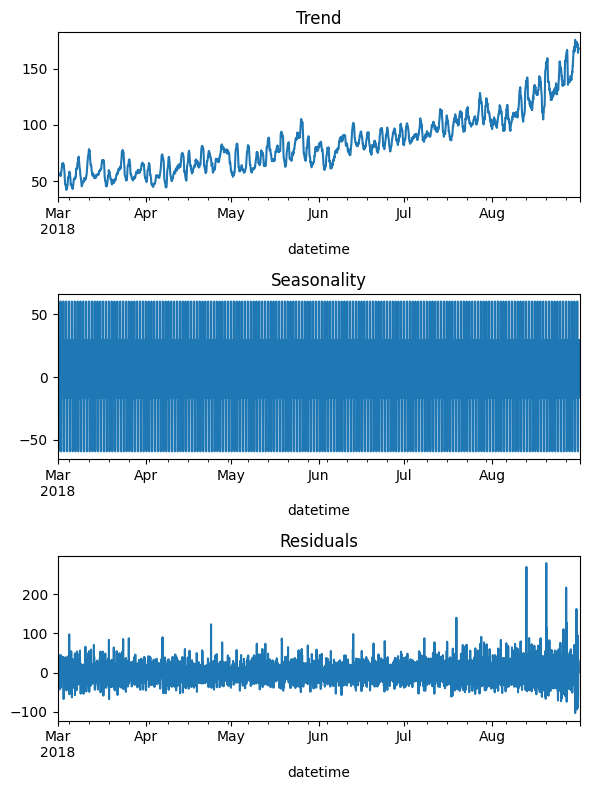

In [10]:
plt.figure(figsize=(6, 8))

# Чтобы график корректно отобразился, указываем его оси ax, 
# равными plt.gca() (англ. get current axis, получить текущие оси)
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')

plt.tight_layout()
plt.show()

По первому графику видно, что с марта наблюдается тренд увеличения количества заказов такси, причем, в августе он выражен ярче по сравнению с другими месяцами (кривая более крутая).

График сезонности рассмотрим в разрезе недели (по дням недели) и по часам.

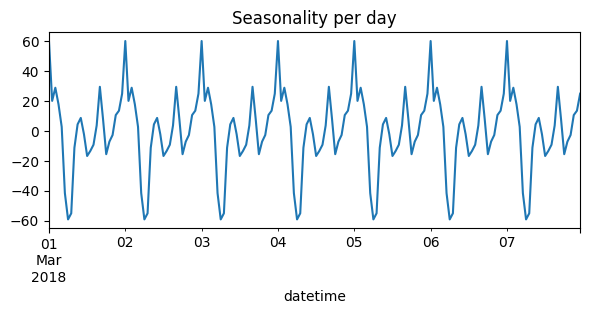

In [11]:
plt.figure(figsize=(6, 8))

plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-07'].plot() #ax=plt.gca()) 
plt.title('Seasonality per day')

plt.tight_layout()
plt.show()

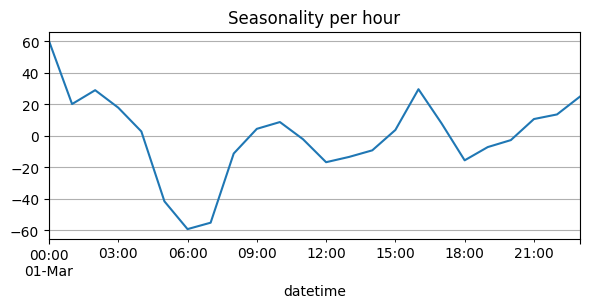

In [12]:
plt.figure(figsize=(6, 8))

plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-01'].plot(grid=True) #ax=plt.gca()) 
plt.title('Seasonality per hour')

plt.tight_layout()
plt.show()

По графикам видно, что изо дня в день наблюдается следующие закономерности: пик заказов приходится на 00:00, 16:00, 10:00, а минимум - на 6 утра. Возможно, это как-то связано с графиком работы общественного транспорта.

Таким образом, мы выяснили, что с марта наблюдается тренд увеличения количества заказов такси, причем, в августе он выражен ярче по сравнению с другими месяцами, а в изменении спроса на такси в течение дня наблюдаются закономерности: пики - в полночь, 10 и 16 часов, а минимум - в 6 утра.

## Обучение

Задача прогнозирования временного ряда состоит в построении модели, которая по историческим данным предскажет будущие значения временного ряда. 

Создадим признаки для горизонта прогнозирования (горизонт прогнозирования - промежуток времени в будущем, на который строится прогноз).

### Создадим новые признаки для нашего ряда

- Календарные признаки (месяц, день, день недели) 
- Отстающие значения (предыдущие значения временного ряда подскажут, будет ли искомая величина расти или уменьшаться)
- Скользящее среднее (как признак задаёт общий тренд временного ряда)

In [13]:
def make_features(data, max_lag, rolling_mean_size):
    #data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

Т.к. в наших данных есть дневная сезонность, то ширину окна скользящего среднего можно взять = 24 (часа)

In [14]:
make_features(data, 24, 24)

In [15]:
data.head(10)

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,3,1,3,43.0,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 06:00:00,12,3,1,3,6.0,43.0,66.0,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 07:00:00,15,3,1,3,12.0,6.0,43.0,66.0,71.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 08:00:00,34,3,1,3,15.0,12.0,6.0,43.0,66.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   month         4416 non-null   int64  
 2   day           4416 non-null   int64  
 3   dayofweek     4416 non-null   int64  
 4   lag_1         4415 non-null   float64
 5   lag_2         4414 non-null   float64
 6   lag_3         4413 non-null   float64
 7   lag_4         4412 non-null   float64
 8   lag_5         4411 non-null   float64
 9   lag_6         4410 non-null   float64
 10  lag_7         4409 non-null   float64
 11  lag_8         4408 non-null   float64
 12  lag_9         4407 non-null   float64
 13  lag_10        4406 non-null   float64
 14  lag_11        4405 non-null   float64
 15  lag_12        4404 non-null   float64
 16  lag_13        4403 non-null   float64
 17  lag_14        4402 non-null

Видим, что в таблице появилось много пропусков. Это связано с тем, что получить признаки для первых записей нельзя: исторических данных по ним нет. Их нужно будет удалить.

In [17]:
data = data.dropna()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-02 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4392 non-null   int64  
 1   month         4392 non-null   int64  
 2   day           4392 non-null   int64  
 3   dayofweek     4392 non-null   int64  
 4   lag_1         4392 non-null   float64
 5   lag_2         4392 non-null   float64
 6   lag_3         4392 non-null   float64
 7   lag_4         4392 non-null   float64
 8   lag_5         4392 non-null   float64
 9   lag_6         4392 non-null   float64
 10  lag_7         4392 non-null   float64
 11  lag_8         4392 non-null   float64
 12  lag_9         4392 non-null   float64
 13  lag_10        4392 non-null   float64
 14  lag_11        4392 non-null   float64
 15  lag_12        4392 non-null   float64
 16  lag_13        4392 non-null   float64
 17  lag_14        4392 non-null

Теперь пропусков нет. 

Разделим данные на обучающую и тестовую выборки (10:1). 

In [19]:
features = data.drop(['num_orders'], axis=1)
target = data['num_orders']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            shuffle=False, 
                                                                            test_size=0.1,
                                                                            random_state=12345)
print(features_train.shape)
print(features_test.shape)

(3952, 28)
(440, 28)


In [20]:
# перечислим количественные признаки
num_features = features_train.filter(like='lag_').columns.to_list() + ['rolling_mean']
print(num_features)

# перечислим качественные признаки
cat_features = features_train.select_dtypes(include='int64').columns.to_list()
print(cat_features)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'rolling_mean']
['month', 'day', 'dayofweek']


Подготовим датасет, в котором будем хранить информацию о характеристиках модели, времени обучении и предсказания, значение метрики.

In [21]:
columns = ['name', 'rmse']
models_data = pd.DataFrame(columns=columns)

### Линейная регрессия

In [22]:
# признаки для ЛР сохраним в отдельные переменные
features_train_lr, features_test_lr = features_train.copy(), features_test.copy()
target_train_lr, target_test_lr = target_train.copy(), target_test.copy()

In [23]:
# для ЛР дополнительно выделим валидационную выборку
features_train_lr, features_valid_lr, target_train_lr, target_valid_lr = train_test_split(features_train_lr, 
                                                                              target_train_lr, 
                                                                              shuffle=False,
                                                                              test_size=0.1, 
                                                                              random_state=12345)

In [24]:
# отмасштабируем признаки
scaler = StandardScaler()
features_train_lr = scaler.fit_transform(features_train_lr[num_features])

features_valid_lr = scaler.transform(features_valid_lr[num_features])

features_test_lr = scaler.transform(features_test_lr[num_features])

In [25]:
model_lr = LinearRegression() # создание модели

model_lr.fit(features_train_lr, target_train_lr) # обучение модели

predict_lr = model_lr.predict(features_valid_lr) # предсказание модели

rmse = mean_squared_error(target_valid_lr, predict_lr)**0.5
print('RMSE =', rmse)

RMSE = 34.34278016133421


In [26]:
# запишем данные в специальную таблицу
models_data.loc[len(models_data.index )] = [model_lr, rmse]

### Случайный лес

In [27]:
# признаки для СЛ сохраним в отдельные переменные
features_train_rf, features_test_rf = features_train.copy(), features_test.copy()
target_train_rf, target_test_rf = target_train.copy(), target_test.copy()

In [28]:
model_rf = RandomForestRegressor(random_state=12345)
scaler = StandardScaler()

pipeline_rf = make_pipeline(scaler, model_rf)

param_grid_rf = {
    'randomforestregressor__n_estimators': [50, 100, 200, 300], #range(10, 251, 10), 
    'randomforestregressor__max_depth': [5, 7, 10] #range(2, 5),
}   

    #'randomforestregressor__min_samples_split': (2, 3, 4),
    #'randomforestregressor__min_samples_leaf': (1, 2, 3, 4)

# получается достаточно много комбинаций гиперпараметров при переборе
# будем использовать RandomizedSearchCV, он работает намного быстрее
rscv_rf = RandomizedSearchCV(
    pipeline_rf, 
    param_distributions=param_grid_rf, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, 
    random_state=12345
)

In [29]:
%%time

rscv_rf.fit(features_train_rf, target_train_rf) #обучили лучшую модель на всем трэйне

gs_rf_best_score = rscv_rf.best_score_ * -1
gs_rf_best_params = rscv_rf.best_params_
print(f'лучшее значение RMSE на обуч.выборке: {gs_rf_best_score}')
print(f'лучшие гиперпараметры: {gs_rf_best_params}')

лучшее значение RMSE на обуч.выборке: 24.765784379796774
лучшие гиперпараметры: {'randomforestregressor__n_estimators': 300, 'randomforestregressor__max_depth': 10}
CPU times: total: 9.08 s
Wall time: 31 s


In [30]:
# запишем данные в специальную таблицу
models_data.loc[len(models_data.index )] = ([rscv_rf.best_estimator_ ['randomforestregressor'], 
                                             gs_rf_best_score])
models_data

,name,rmse
0,LinearRegression(),34.342780
1,"(DecisionTreeRegressor(max_depth=10, max_featu...",24.765784


### CatBoostRegressor

In [31]:
%%time
catboost = CatBoostRegressor() #loss_function='RMSE')

parameters_cat = {'depth': [5, 7, 10], 
                  'learning_rate': [0.01, 0.05], 
                  #'l2_leaf_reg': [1],
                  'iterations': [100, 200, 300]} 

catboost_grid = GridSearchCV(catboost, 
                             parameters_cat, 
                             scoring="neg_root_mean_squared_error", 
                             cv = 4,
                             verbose=100,
                             n_jobs=-1)

CPU times: total: 0 ns
Wall time: 0 ns


In [32]:
%%time

catboost_grid.fit(features_train, target_train)

catboost_best_score = catboost_grid.best_score_ * -1
catboost_best_params = catboost_grid.best_params_
print(f'лучшее значение RMSE на обуч.выборке: {catboost_best_score}')
print(f'лучшие гиперпараметры: {catboost_best_params}')

Fitting 4 folds for each of 18 candidates, totalling 72 fits
0:	learn: 37.8071891	total: 65ms	remaining: 19.4s
1:	learn: 36.9836392	total: 75.7ms	remaining: 11.3s
2:	learn: 36.2311795	total: 86.2ms	remaining: 8.53s
3:	learn: 35.5219250	total: 91ms	remaining: 6.73s
4:	learn: 34.7959845	total: 95.9ms	remaining: 5.66s
5:	learn: 34.1290375	total: 101ms	remaining: 4.93s
6:	learn: 33.4806699	total: 106ms	remaining: 4.42s
7:	learn: 32.9184667	total: 110ms	remaining: 4.03s
8:	learn: 32.3982242	total: 115ms	remaining: 3.73s
9:	learn: 31.8476490	total: 119ms	remaining: 3.45s
10:	learn: 31.3526511	total: 122ms	remaining: 3.22s
11:	learn: 30.9204552	total: 126ms	remaining: 3.02s
12:	learn: 30.4719508	total: 129ms	remaining: 2.86s
13:	learn: 30.0473856	total: 133ms	remaining: 2.72s
14:	learn: 29.6639915	total: 137ms	remaining: 2.6s
15:	learn: 29.3217137	total: 140ms	remaining: 2.49s
16:	learn: 28.9777740	total: 144ms	remaining: 2.4s
17:	learn: 28.6502012	total: 147ms	remaining: 2.31s
18:	learn: 28.

156:	learn: 20.3085543	total: 648ms	remaining: 591ms
157:	learn: 20.3019651	total: 653ms	remaining: 587ms
158:	learn: 20.2706345	total: 657ms	remaining: 582ms
159:	learn: 20.2570030	total: 660ms	remaining: 578ms
160:	learn: 20.2349527	total: 665ms	remaining: 574ms
161:	learn: 20.2251228	total: 669ms	remaining: 570ms
162:	learn: 20.2112095	total: 673ms	remaining: 565ms
163:	learn: 20.1939861	total: 677ms	remaining: 561ms
164:	learn: 20.1768314	total: 681ms	remaining: 557ms
165:	learn: 20.1473582	total: 684ms	remaining: 553ms
166:	learn: 20.1093368	total: 688ms	remaining: 548ms
167:	learn: 20.1078616	total: 692ms	remaining: 544ms
168:	learn: 20.0725630	total: 696ms	remaining: 539ms
169:	learn: 20.0488694	total: 700ms	remaining: 535ms
170:	learn: 20.0317175	total: 703ms	remaining: 530ms
171:	learn: 20.0284587	total: 707ms	remaining: 526ms
172:	learn: 19.9972363	total: 711ms	remaining: 522ms
173:	learn: 19.9747954	total: 714ms	remaining: 517ms
174:	learn: 19.9392653	total: 718ms	remaining:

In [33]:
models_data.loc[len(models_data.index )] = [catboost_grid, 
                                            catboost_best_score]
models_data

,name,rmse
0,LinearRegression(),34.342780
1,"(DecisionTreeRegressor(max_depth=10, max_featu...",24.765784
2,"GridSearchCV(cv=4,\n estimator=<ca...",24.063176


### LightGBM

In [34]:
features_train_lgb = features_train.copy().astype({"month":'category',
                                  "day":'category',
                                  "dayofweek":'category'})
features_test_lgb = features_test.copy().astype({"month":'category',
                                  "day":'category',
                                  "dayofweek":'category'})

In [35]:
#CODE REVIEW
import os

In [36]:
def lgb_regr(features, target):
    model = LGBMRegressor()
    params = {
        'boosting_type' : ['gbdt'],
        'n_estimators' : [100, 200, 300],
        'max_depth' : [5, 7, 10],
        'learning_rate': [0.01, 0.05],
        'verbose' : [10],
        'random_state' : [12345],
    }
    grid_cv = GridSearchCV(estimator=model, param_grid=params, cv=4, n_jobs=os.cpu_count()//2, scoring='neg_root_mean_squared_error')
    grid_cv.fit(features, target, categorical_feature=cat_features)
    print('Best hyperparams: ', grid_cv.best_params_)
    print('RMSW score on train sample: {:.2f}'.format(-grid_cv.best_score_))
    return grid_cv.best_params_, -grid_cv.best_score_, grid_cv

In [37]:
%%time
lgb_params, rmse_lgb, model_lgb = lgb_regr(features_train_lgb, target_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.012941
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.000371 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4854
[LightGBM] [Info] Number of data points in the train set: 3952, number of used features: 28
[LightGBM] [Info] Start training from score 78.451417
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trai

C:\Users\lexus\anaconda3\envs\practicum\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


In [38]:
models_data.loc[len(models_data.index )] = [model_lgb, rmse_lgb]
models_data

,name,rmse
0,LinearRegression(),34.342780
1,"(DecisionTreeRegressor(max_depth=10, max_featu...",24.765784
2,"GridSearchCV(cv=4,\n estimator=<ca...",24.063176
3,"GridSearchCV(cv=4, estimator=LGBMRegressor(), ...",24.933798


Мы обучили несколько моделей машинного обучения, проверили их качество на обучающей выборке. Все модели показали приемлемое качество, исследуемая метрика RMSE меньше 48, что удовлетворяет условию задачи. Самый лучший результат RMSE у модели CatBoostRegressor. Проверим ее на тестовой выборке.

## Тестирование

In [39]:
predict_cat = catboost_grid.predict(features_test)

rmse_cat = mean_squared_error(target_test, predict_cat)**0.5

print('Тестовое RMSE = {:.2f}'.format(rmse_cat))

Тестовое RMSE = 42.77


Мы проверили наилучшую модель на тестовой выборке, метрика качества получилась ниже 48, что удовлетворяет условию задачи.

In [40]:
predict_data = pd.DataFrame(predict_cat, index=target_test.index) 

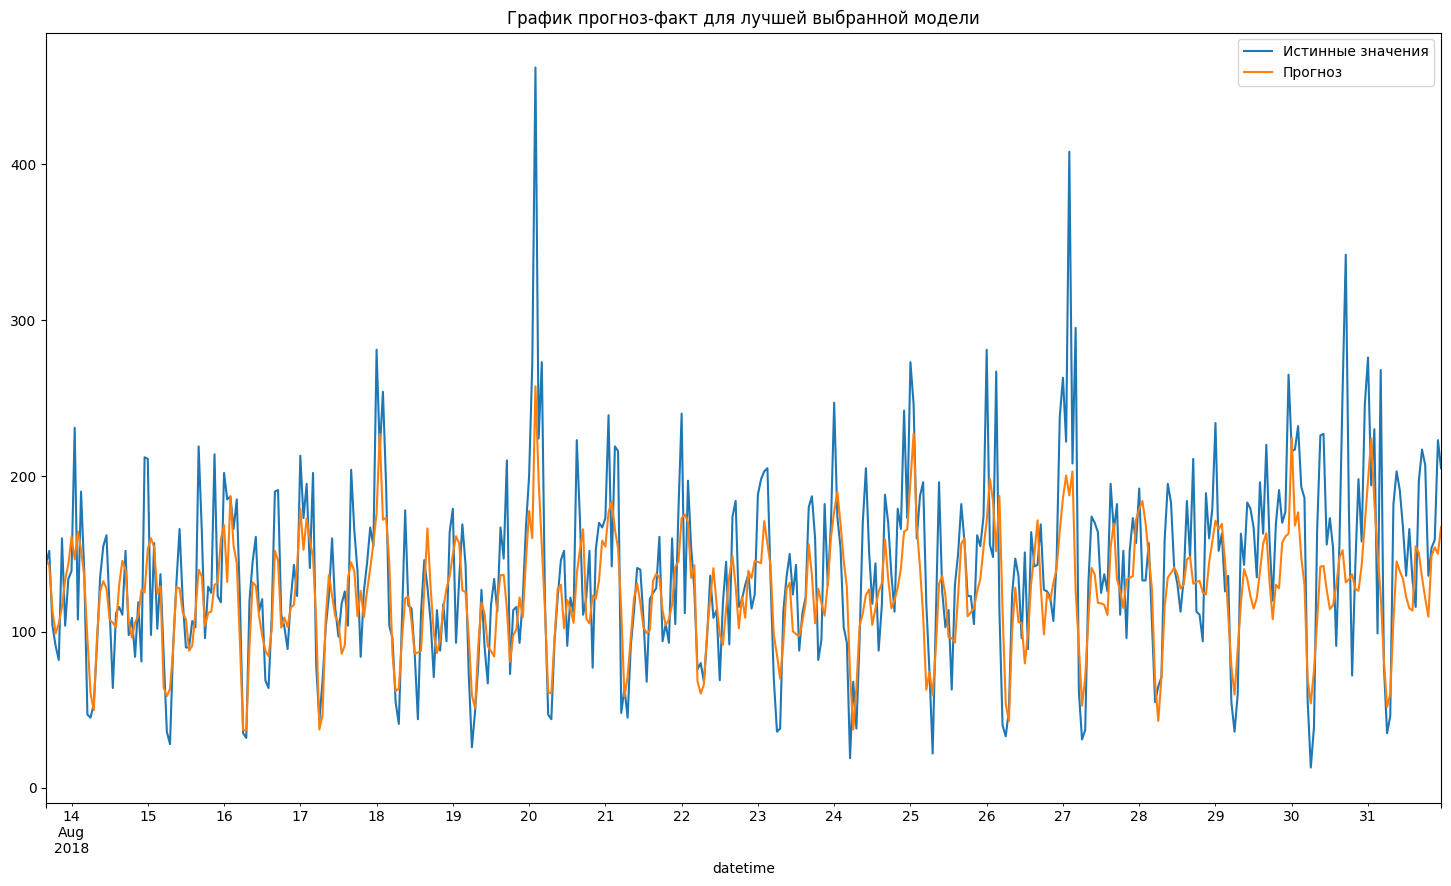

In [41]:
plt.figure(figsize=(18, 10))
ax = target_test.plot()
predict_data.plot(ax=ax) 
plt.legend(['Истинные значения', 'Прогноз'])
plt.title('График прогноз-факт для лучшей выбранной модели')
plt.show()

На графике прогноз-факт для лучшей выбранной модели видно, что нашей модели удалось уловить суточную изменчивость спроса: она более менее точно предсказала пики и минимумы спроса на услуги такси в течение дня.

**Итоговые выводы**

В процессе выполнения проекта мы выполнили следующие этапы работ: 

Подготовительный, на котором мы провели подготовку данных: ознакомились и изучили их, изменили тип данных, установили дату в качестве индекса, провели сортировку по индексу, проверили ряд на монотонность, провели ресемплирование временного ряда.

Аналитический, на котором мы выяснили, что с марта наблюдается тренд увеличения количества заказов такси, причем, в августе он рост выражен ярче по сравнению с другими месяцами, а в изменении спроса на такси в течение дня обнаружили следующие закономерности: пики - в полночь, 10 и 16 часов, а минимум - в 6 утра.

Этап обучения моделей, на котором мы обучили несколько моделей машинного обучения, проверили их качество на обучающей выборке. Все модели показали приемлемое качество, исследуемая метрика RMSE меньше 48, что удовлетворяет условию задачи. Самый лучший результат RMSE оказался у модели CatBoostRegressor. 

Этап тестирования, на котором мы проверили работу наилучшей модели (CatBoostRegressor) на тестовых данных, построили для нее график факт-прогноз. Метрика качества получилась ниже 48, что удовлетворяет условию поставленной задачи.